**5. Sobre la imagen microscope.png, aplicar los siguientes pasos:**
1. Binarizar la imagen (si no está binarizada).
2. Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene?
3. Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria donde sólo quede la mayor componente conexa.
4. Aplicar operaciones morfológicas para contar cuántas células hay en total. ¿Comparar el número obtenido contra el número verdadero de células? ¿Son iguales?

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 1. Cargar y binarizar la imagen
image_path = "img/microscope.png"
img = cv2.imread(image_path)

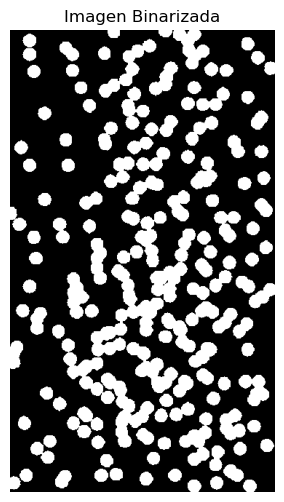

La componente conexa de menor tamaño tiene: 158 píxeles


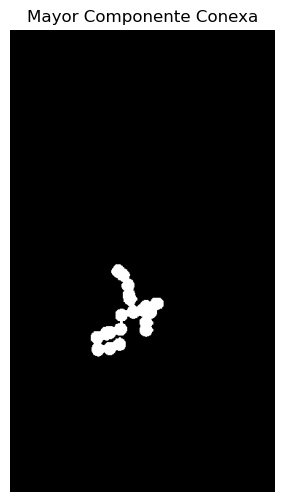

Número de células detectadas mediante operaciones morfológicas: 128


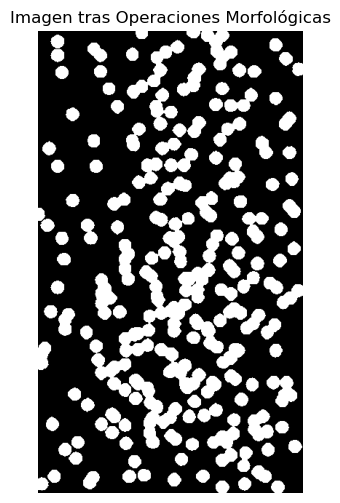

In [6]:
if img is None:
    print("Error al cargar la imagen.")
else:
    # Convertir a escala de grises si es necesario
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    # Binarizar la imagen usando el método de Otsu
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    plt.figure(figsize=(6,6))
    plt.imshow(binary, cmap='gray')
    plt.title("Imagen Binarizada")
    plt.axis("off")
    plt.show()

    # 2. Obtener la componente conexa de menor tamaño
    # Usamos connectedComponentsWithStats para etiquetar componentes conexas
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    
    # Excluir el fondo (etiqueta 0) y obtener el área de cada componente
    # stats[:, cv2.CC_STAT_AREA] devuelve el área de cada componente
    areas = stats[1:, cv2.CC_STAT_AREA]  # se excluye el fondo
    min_area = np.min(areas)
    print("La componente conexa de menor tamaño tiene:", min_area, "píxeles")
    
    # 3. Recortar la componente conexa de mayor tamaño y remover el resto
    max_area = np.max(areas)
    # Obtener la etiqueta de la mayor componente (sumamos 1 ya que se excluyó el fondo)
    max_label = np.argmax(areas) + 1  
    # Crear una imagen binaria en la que solo se muestre la mayor componente
    largest_component = np.zeros_like(binary)
    largest_component[labels == max_label] = 255
    
    plt.figure(figsize=(6,6))
    plt.imshow(largest_component, cmap='gray')
    plt.title("Mayor Componente Conexa")
    plt.axis("off")
    plt.show()
    
    # 4. Aplicar operaciones morfológicas para contar cuántas células hay en total
    # Se utiliza una apertura para separar células que pudieran estar unidas
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Volvemos a etiquetar las componentes conexas en la imagen procesada
    num_labels_morph, labels_morph, stats_morph, centroids_morph = cv2.connectedComponentsWithStats(morph, connectivity=8)
    # Restamos 1 para eliminar el fondo
    num_cells = num_labels_morph - 1
    print("Número de células detectadas mediante operaciones morfológicas:", num_cells)
    
    plt.figure(figsize=(6,6))
    plt.imshow(morph, cmap='gray')
    plt.title("Imagen tras Operaciones Morfológicas")
    plt.axis("off")
    plt.show()


**Binarización de la imagen:**

Se binarizó la imagen (utilizando Otsu) para obtener una imagen en blanco y negro que distinga claramente entre el fondo y las células.

**Componente conexa de menor tamaño:**

Al etiquetar las componentes conexas, se identificó aquella con el menor número de píxeles; su área se obtiene de los stats y se muestra en píxeles (por ejemplo, "La componente conexa de menor tamaño tiene: X píxeles").

**Recortar la mayor componente conexa:**

Se extrajo la componente conexa con mayor área y se creó una imagen binaria en la que solo aparece esta componente, eliminando el resto de las regiones.

**Conteo de células con operaciones morfológicas:**

Aplicando una apertura (morfología) se logró separar las células que estuvieran fusionadas. Luego se contó el número de componentes conexas resultantes. En general, el número obtenido mediante estas operaciones puede diferir del número verdadero de células, ya que el proceso morfológico puede fusionar células adyacentes o fragmentar algunas, afectando el conteo exacto.